<a href="https://colab.research.google.com/github/RJames34/cs506-off_campus_housing-Ren-James/blob/main/CS_506.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# Importing libraries we will need
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

#Import more as we go along
import folium
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib.image as mpimg

In [40]:
# Importing the dataset for use
# Violations on Boston buildings or properties issued by inspectors from the 
# Building and Structures Division of the Inspectional Services Department.

filename = os.path.join(os.getcwd(), "rawdata/BuildingPropertyViolations", "Building_Property_Violations_2019_Sep_28_2025.csv")

In [41]:
# Creating a variable to hold the data set
df = pd.read_csv(filename, header = 0)

In [42]:
# Viewing the data 

# (Rows, Columns)
df.shape

# view the columns and rows, first 10 for genreal idea of what it looks like
df.head(10)

,_id,case_no,ap_case_defn_key,status_dttm,status,code,value,description,violation_stno,violation_sthigh,...,ward,contact_addr1,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location
0,1,V91983,1013,NaN,Closed,121.2,NaN,Unsafe and Dangerous,302,NaN,...,01,302 Sumner St,NaN,East Boston,MA,02128,132380.0,42.367678,-71.036580,"(42.367678491254956, -71.0365803778755)"
1,2,V863756,1013,2025-09-26 14:47:03,Open,105.1,NaN,Failure to Obtain Permit,37,NaN,...,17,35 FAIRMOUNT ST,NaN,DORCHESTER,MA,02124,55823.0,42.281030,-71.072991,"(42.28102954599074, -71.07299065262531)"
2,3,V863752,1013,2025-09-26 14:12:57,Open,105.1,NaN,Failure to Obtain Permit,614,NaN,...,09,213 Newbury street,NaN,Boston,Ma,02116,92493.0,42.337200,-71.077451,"(42.33719954706552, -71.07745053724503)"
3,4,V849444,1013,2025-09-26 14:06:25,Open,102.8,NaN,Maintenance,3,NaN,...,05,3 GOODWIN PL UNIT 1,NaN,BOSTON,MA,02114,65316.0,42.359880,-71.069020,"(42.359879534297896, -71.06902046719476)"
4,5,V849435,1013,2025-09-26 14:05:49,Open,102.8,NaN,Maintenance,4,NaN,...,05,4 GOODWIN PLACE,UNIT 4,BOSTON,MA,02114,65322.0,42.359880,-71.069180,"(42.35987953438437, -71.06918046776687)"
5,6,V849446,1013,2025-09-26 14:05:02,Open,102.8,NaN,Maintenance,68,70,...,05,5 ALPINE ROAD,NaN,MANCHESTER,MA,01944,110082.0,42.360187,-71.069201,"(42.36018710675776, -71.06920092084883)"
6,7,V843370,1013,2025-09-26 08:22:12,Open,3307,NaN,Protection of Adj. Property,66,NaN,...,06,66 N ST,NaN,SOUTH BOSTON,MA,02127,100140.0,42.336199,-71.030980,"(42.336199485404066, -71.03098043503404)"
7,8,V777054,1013,2025-09-26 08:20:02,Open,1001.3.2,NaN,Testing & Certification,771,NaN,...,06,771 E BROADWAY,NaN,SOUTH BOSTON,MA,02127,21179.0,42.335467,-71.034316,"(42.33546748975727, -71.03431644427319)"
8,9,V845185,1013,2025-09-26 08:17:53,Open,Article 4 Section 4-3,NaN,No use of premises permit:,96,NaN,...,14,96 Brunswick St,NaN,Dorchester,MA,02121,22915.0,42.310980,-71.079811,"(42.310979552588336, -71.07981060135211)"
9,10,V863492,1013,2025-09-25 09:32:57,Open,107.4,NaN,Failed to comply w permit term,23,NaN,...,18,23 GRASSMERE RD,NaN,HYDE PARK,MA,02136,66017.0,42.268670,-71.129391,"(42.26866962746323, -71.12939080775053)"


In [43]:
# Trying to Clean the Data Set

df = df.drop(columns =['value', 'location', "ap_case_defn_key"])
df_filtered = df[(df['status_dttm']>='2020-01-01')&(df['status_dttm'] <='2024-12-31')]

df_filtered.columns

df_filtered.head(10)


,_id,case_no,status_dttm,status,code,description,violation_stno,violation_sthigh,violation_street,violation_suffix,...,violation_zip,ward,contact_addr1,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude
610,611,V807184,2024-12-30 10:19:11,Closed,102.8,Maintenance,51,NaN,Beech Glen,ST,...,02119,11,51 BEECH GLEN,NaN,ROXBURY,MA,02119,13344.0,42.324460,-71.095251
611,612,V806319,2024-12-26 08:23:23,Closed,105.1,Failure to Obtain Permit,1162,NaN,Morton,ST,...,02126,17,1162 Morton ST,NaN,MATTAPAN,MA,02126,97659.0,42.275810,-71.073231
612,613,V805052,2024-12-20 13:47:15,Closed,102.8,Maintenance,1,5,Harvard,AV,...,02134,21,C/O O'BRIENS PUB/GAIL ATKINSON,3 HARVARD AVE,BOSTON,MA,02134,156445.0,42.355261,-71.132901
613,614,V805020,2024-12-20 09:40:32,Closed,105.4,Validity of Permit,133,NaN,River,ST,...,02126,17,45 SIERRA RD,NaN,HYDE PARK,MA,02136,116362.0,42.271670,-71.076661
614,615,V805017,2024-12-20 09:26:35,Open,105.1,Failure to Obtain Permit,31,NaN,Hazleton,ST,...,02126,14,31 HAZLETON ST UNIT #2,NaN,MATTAPAN,MA,02126,72259.0,42.279550,-71.094591
615,616,V805010,2024-12-20 09:06:39,Open,102.8,Maintenance,31,NaN,Hazleton,ST,...,02126,14,31 HAZLETON ST UNIT #2,NaN,MATTAPAN,MA,02126,72259.0,42.279550,-71.094591
616,617,V805006,2024-12-20 08:53:56,Closed,3307,Protection of Adj. Property,9,NaN,Queen,ST,...,02122,16,9 QUEEN ST,NaN,DORCHESTER,MA,02122,113713.0,42.293680,-71.053369
617,618,V804383,2024-12-18 09:04:18,Open,116,Unsafe Structures,24,NaN,Factory,ST,...,02136,18,15 BARBER ST,NaN,MEDWAY,MA,02053,165148.0,42.253089,-71.126206
618,619,V804382,2024-12-18 08:54:10,Open,102.8,Maintenance,8,10,Winter,ST,...,02136,18,39 BRIGHTON AVE,NaN,BOSTON,MA,02134,171888.0,42.248467,-71.127904
619,620,V799466,2024-12-18 08:40:58,Closed,102.8,Maintenance,383,385,Blue Hill,AV,...,02121,12,"100 HANO ST, Unit SUITE-26",NaN,ALLSTON,MA,02134,16442.0,42.311690,-71.081133


# Additional Cleaning of Data Set

Extra Notes:
* Keep Track of Duplicates in the Data Set

In [44]:
# print(type(df["longitude"].iloc[0]))
# => <class 'numpy.float64'>

# Longitude and latitude should match up with the Violation Address

# Definitely incorrect latitude and longitude coordinates (don't align with Boston based coordinates)
# print(df_filtered.loc[df_filtered["latitude"] < 35.0, 'latitude'].unique()) # => [34.24438675]; 12
# print(df_filtered.loc[df_filtered["latitude"] < 35.0, 'longitude'].unique()) # => [-73.6513909]; 12 
tofix = df_filtered.loc[df_filtered["latitude"] < 35.0, ['violation_stno','violation_sthigh', 'violation_street', 'violation_suffix', 'violation_city', 'violation_zip']]
print(tofix)

# Note, maybe get rid of violation_city because not as stable (i.e. BOSTON vs. Dorchester, the neighborhood)
# edit the latitude and longitude to reflect the violation address
df_filtered.loc[848, 'latitude'] = 42.343027220313964
df_filtered.loc[848, 'longitude'] = -71.14211313180992
df_filtered.loc[1036, 'latitude'] = 42.338779
df_filtered.loc[1036, 'longitude'] = -71.074891
df_filtered.loc[1042, 'latitude'] = 42.338779
df_filtered.loc[1042, 'longitude'] = -71.074891
df_filtered.loc[1450, 'latitude'] = 42.348953730949624
df_filtered.loc[1450, 'longitude'] = -71.0740162454226
df_filtered.loc[1691, 'latitude'] = 42.35057220622822
df_filtered.loc[1691, 'longitude'] = -71.06472783431131
df_filtered.loc[2360, 'latitude'] = 42.287781542307286
df_filtered.loc[2360, 'longitude'] = -71.12651620309748
df_filtered.loc[2489, 'latitude'] = 42.380880525389166
df_filtered.loc[2489, 'longitude'] = -71.03642543007726
df_filtered.loc[2524, 'latitude'] = 42.380880525389166
df_filtered.loc[2524, 'longitude'] = -71.03642543007726
df_filtered.loc[2853, 'latitude'] = 42.380880525389166
df_filtered.loc[2853, 'longitude'] = -71.03642543007726
df_filtered.loc[3644, 'latitude'] = 42.28118811528601
df_filtered.loc[3644, 'longitude'] = -71.08461717611357
df_filtered.loc[3704, 'latitude'] = 42.37686781366109
df_filtered.loc[3704, 'longitude'] = -71.03121096076508
df_filtered.loc[3928, 'latitude'] = 42.34989474944399
df_filtered.loc[3928, 'longitude'] = -71.1308676742585

# Think this should be fixed now
tofix = df_filtered.loc[df_filtered["latitude"] < 35.0, ['violation_stno','violation_sthigh', 'violation_street', 'violation_suffix', 'violation_city', 'violation_zip']]
print(tofix)


     violation_stno violation_sthigh violation_street violation_suffix  \
848              30                        Washington               ST   
1036              2               14          CUMSTON               ST   
1042              2               14          CUMSTON               ST   
1450            135                         CLARENDON               ST   
1691            252              272          TREMONT               ST   
2360           4174                        Washington               ST   
2489             80                             White               ST   
2524             80                             White               ST   
2853             80                             White               ST   
3644            888                            Morton               ST   
3704            300                           CHELSEA               ST   
3928            201                           HARVARD               AV   

        violation_city violation_zip 

In [45]:
# More to Fix I.e. with other Nan?
tofix = df_filtered.loc[df_filtered["latitude"].isna(), ['violation_stno','violation_sthigh', 'violation_street', 'violation_suffix', 'violation_city', 'violation_zip']]
#print(tofix)

df_filtered.loc[776, 'latitude'] = 42.267725
df_filtered.loc[776, 'longitude'] = -71.172992
df_filtered.loc[1219, 'latitude'] = 42.354328
df_filtered.loc[1219, 'longitude'] = -71.075584
df_filtered.loc[1848, 'latitude'] = 42.287029
df_filtered.loc[1848, 'longitude'] = -71.064201
df_filtered.loc[2981, 'latitude'] = 42.395302
df_filtered.loc[2981, 'longitude'] = -71.653143
df_filtered.loc[3333, 'latitude'] = 42.395302
df_filtered.loc[3333, 'longitude'] = -71.653143
df_filtered.loc[4215, 'latitude'] = 42.358
df_filtered.loc[4215, 'longitude'] = -71.062
df_filtered.loc[4324, 'latitude'] = 42.395302
df_filtered.loc[4324, 'longitude'] = -71.653143

# print(df_filtered.loc[2003])
# print(df_filtered.loc[2004])
# Use of Contact Address instead of the Violation Address since Missing Information
df_filtered.loc[2003, 'latitude'] = 42.3319377
df_filtered.loc[2003, 'longitude'] = -71.045559
df_filtered.loc[2004, 'latitude'] = 42.3319377
df_filtered.loc[2004, 'longitude'] = -71.045559


In [ ]:
# Create year based groupings of building violations
year2020 = df_filtered[(df_filtered['status_dttm'] >= '2020-01-01') & (df_filtered['status_dttm'] <= '2020-12-31')]
year2021 = df_filtered[(df_filtered['status_dttm'] >= '2021-01-01') & (df_filtered['status_dttm'] <= '2021-12-31')]
year2022 = df_filtered[(df_filtered['status_dttm'] >= '2022-01-01') & (df_filtered['status_dttm'] <= '2022-12-31')]
year2023 = df_filtered[(df_filtered['status_dttm'] >= '2023-01-01') & (df_filtered['status_dttm'] <= '2023-12-31')]
year2024 = df_filtered[(df_filtered['status_dttm'] >= '2024-01-01') & (df_filtered['status_dttm'] <= '2024-12-31')]

'''
df_filtered.to_csv('Building_Property_Violations_year2020_2024.csv', index=False)
year2020.to_csv('Building_Property_Violations_year2020.csv', index=False)
year2021.to_csv('Building_Property_Violations_year2021.csv', index=False)
year2022.to_csv('Building_Property_Violations_year2022.csv', index=False)
year2023.to_csv('Building_Property_Violations_year2023.csv', index=False)
year2024.to_csv('Building_Property_Violations_year2024.csv', index=False)
'''

# print("2020", len(year2020)) # => 731
# print("2021", len(year2021)) # => 688
# print("2022", len(year2022)) # => 904
# print("2023", len(year2023)) # => 657
# print("2024", len(year2024)) # => 848

# Starting Visualization
Playing around with visualizations.

Make Separate Graphs:
* Neighborhood Graphs and Points; Diff Colors for diff neighborhoods
* Yearly Graph Progression
* Desc of Violations Graph, Maybe Group Desc of Violations

In [9]:
import folium
from IPython.display import display
import geopandas as gpd

import json
from shapely.geometry import Polygon, Point, shape, mapping
from shapely.ops import transform

from branca.element import Figure
import imageio.v2 as imageio # Use v2 for modern imageio


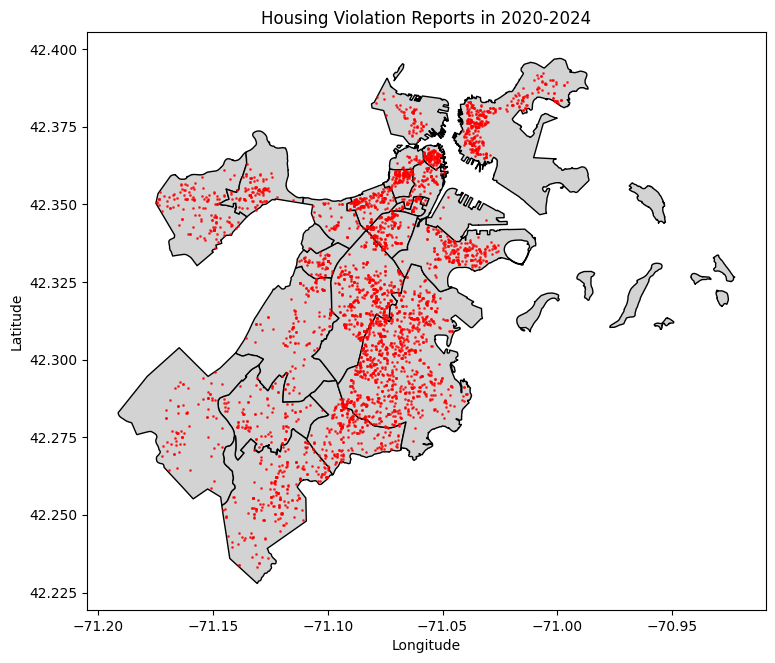

In [10]:
# Static Overlay

fig, ax = plt.subplots(1, 1, figsize=(12, 7.5))

NeighborhoodswData = gpd.read_file('rawdata/ShapeFiles/Boston_Neighborhood_Boundaries.shp')

# Overlay the scatterplot
NeighborhoodswData.plot(ax=ax, color='lightgray', edgecolor='black') 
ax.scatter(df_filtered['longitude'], df_filtered['latitude'], s=1, color='red', alpha=0.7, zorder=5) 

ax.set_title('Housing Violation Reports in 2020-2024')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

In [11]:
import matplotlib.image as mpimg
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt

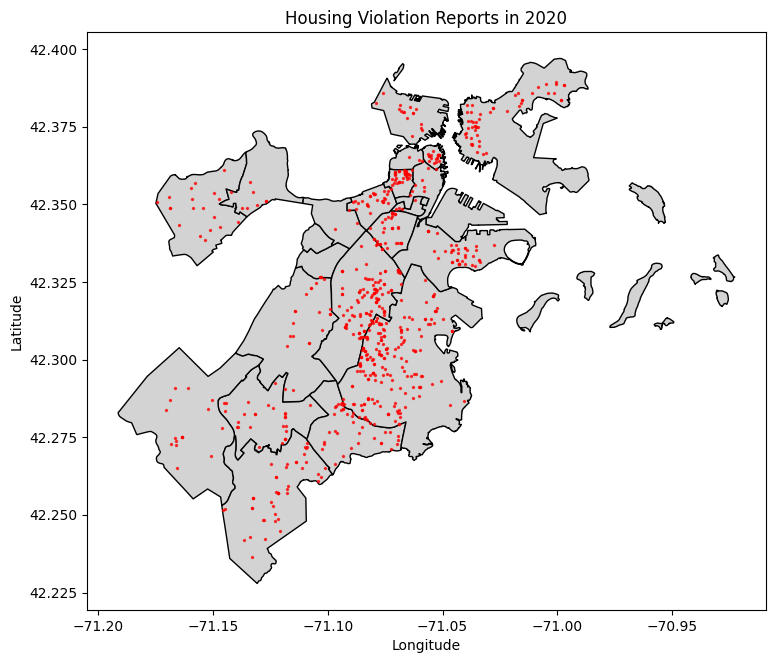

In [12]:
# Static Overlay for 2020
fig, ax = plt.subplots(1, 1, figsize=(12, 7.5))

neighborhoods = gpd.read_file('rawdata/ShapeFiles/Boston_Neighborhood_Boundaries.shp')

# Overlay the scatterplot
neighborhoods.plot(ax=ax, color='lightgray', edgecolor='black') 
ax.scatter(year2020['longitude'], year2020['latitude'], s=2, color='red', alpha=0.7, zorder=5) 

ax.set_title('Housing Violation Reports in 2020')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

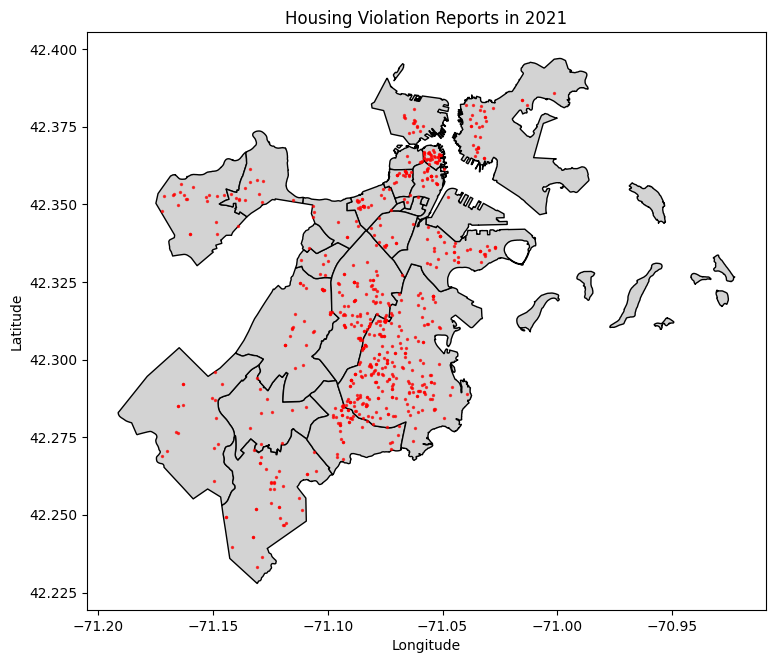

In [13]:
# Static Overlay for 2021
fig, ax = plt.subplots(1, 1, figsize=(12, 7.5))

neighborhoods = gpd.read_file('rawdata/ShapeFiles/Boston_Neighborhood_Boundaries.shp')

# Overlay the scatterplot
neighborhoods.plot(ax=ax, color='lightgray', edgecolor='black') 
ax.scatter(year2021['longitude'], year2021['latitude'], s=2, color='red', alpha=0.7, zorder=5) 

ax.set_title('Housing Violation Reports in 2021')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

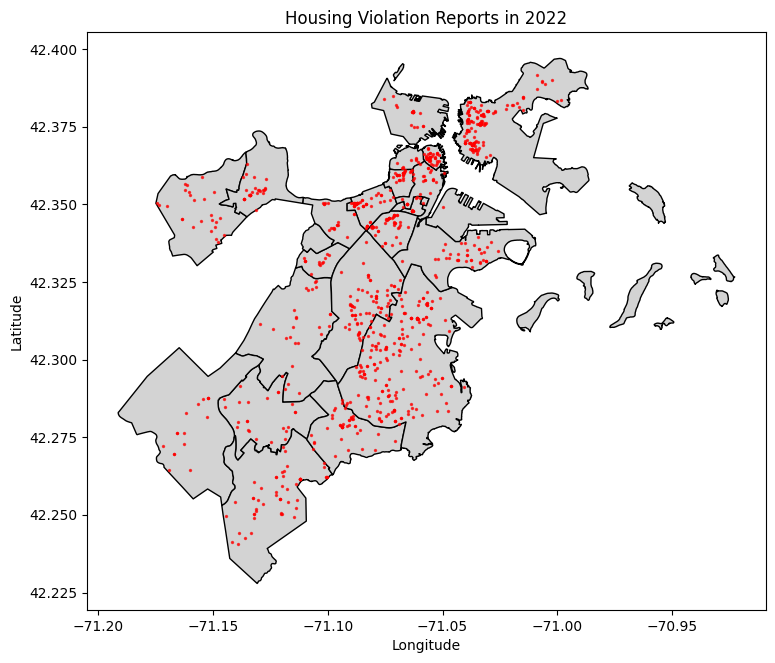

In [14]:
# Static Overlay for 2022
fig, ax = plt.subplots(1, 1, figsize=(12, 7.5))

neighborhoods = gpd.read_file('rawdata/ShapeFiles/Boston_Neighborhood_Boundaries.shp')

# Overlay the scatterplot
neighborhoods.plot(ax=ax, color='lightgray', edgecolor='black') 
ax.scatter(year2022['longitude'], year2022['latitude'], s=2, color='red', alpha=0.7, zorder=5) 

ax.set_title('Housing Violation Reports in 2022')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

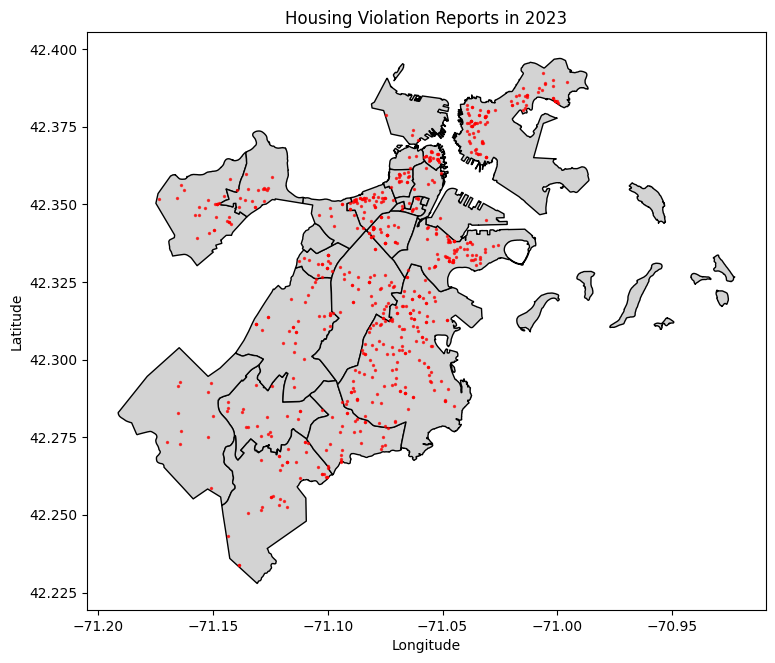

In [15]:
# Static Overlay for 2023
fig, ax = plt.subplots(1, 1, figsize=(12, 7.5))

neighborhoods = gpd.read_file('rawdata/ShapeFiles/Boston_Neighborhood_Boundaries.shp')

# Overlay the scatterplot
neighborhoods.plot(ax=ax, color='lightgray', edgecolor='black') 
ax.scatter(year2023['longitude'], year2023['latitude'], s=2, color='red', alpha=0.7, zorder=5) 

ax.set_title('Housing Violation Reports in 2023')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

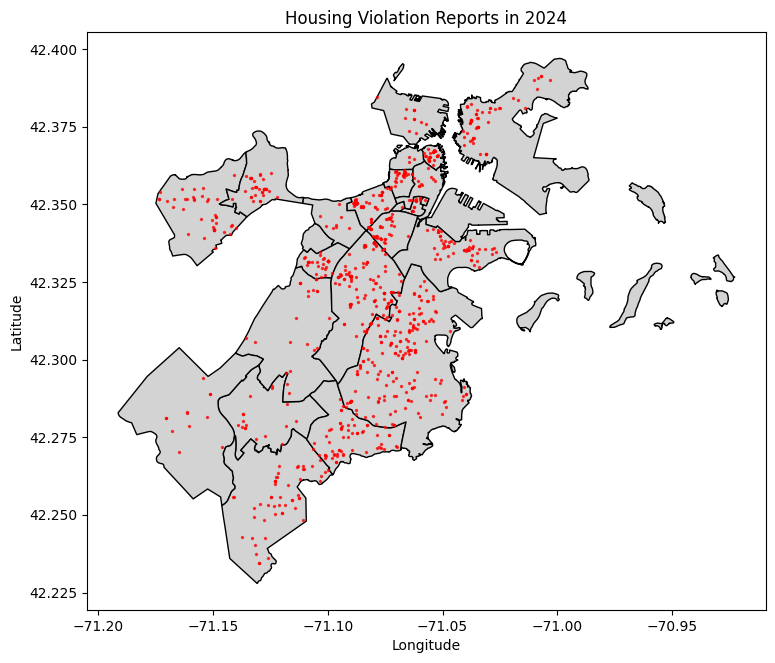

In [16]:
# Static Overlay for 2024
fig, ax = plt.subplots(1, 1, figsize=(12, 7.5))

neighborhoods = gpd.read_file('rawdata/ShapeFiles/Boston_Neighborhood_Boundaries.shp')

# Overlay the scatterplot
neighborhoods.plot(ax=ax, color='lightgray', edgecolor='black') 
ax.scatter(year2024['longitude'], year2024['latitude'], s=2, color='red', alpha=0.7, zorder=5) 

ax.set_title('Housing Violation Reports in 2024')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

# Separate into Different Neighborhoods 
Chunks based on Latitude/Longitude Graphs for Clarity.

# Run Clustering Methods to Visualize the Largest Clumps of Violations

In [ ]:
from datasets import load_dataset
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
import kmedoids
import seaborn as sns
import pandas as pd

from sklearn.metrics import (
    adjusted_rand_score,
    normalized_mutual_info_score,
    confusion_matrix
)
from collections import Counter
from sklearn.manifold import TSNE
import collections


C:\Users\irisj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


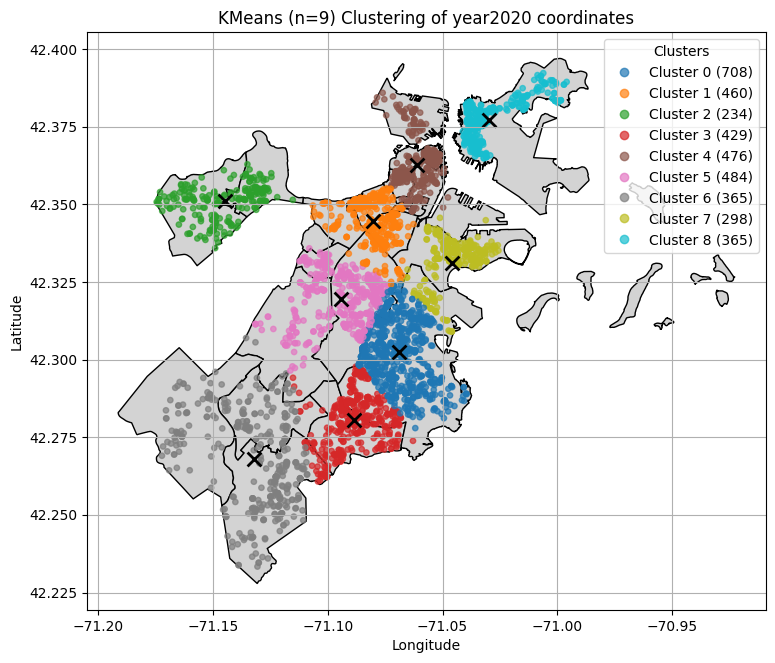

In [ ]:
# Run KMeans clustering on year2020-2024 latitude/longitude data

# Prepare data (drop rows with missing coords)
X = df_filtered[["latitude", "longitude"]].dropna()

# Fit KMeans (adjust n_clusters as desired)
n_clusters = 9
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_  # centroids in [latitude, longitude] order

# Plot clusters (longitude = x-axis, latitude = y-axis)
fig, ax = plt.subplots(1, 1, figsize=(12, 7.5))

neighborhoods = gpd.read_file('rawdata/ShapeFiles/Boston_Neighborhood_Boundaries.shp')

# Overlay the scatterplot
neighborhoods.plot(ax=ax, color='lightgray', edgecolor='black')

scatter = ax.scatter(X["longitude"], X["latitude"], c=labels, cmap='tab10', s=15, alpha=0.7)
# Plot centroids (note ordering)
ax.scatter(centroids[:, 1], centroids[:, 0], c='black', marker='x', s=100, linewidths=2, label='centroids')

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title(f"KMeans (n={n_clusters}) Clustering of year2020-2024 coordinates")
ax.grid(True)

# Print cluster sizes and add legend showing counts
counts = collections.Counter(labels)
legend_labels = [f'Cluster {i} ({counts[i]})' for i in range(n_clusters)]
# use scatter's legend elements for color swatches
handles, _ = scatter.legend_elements()
ax.legend(handles=handles, labels=legend_labels, title='Clusters', loc='best')


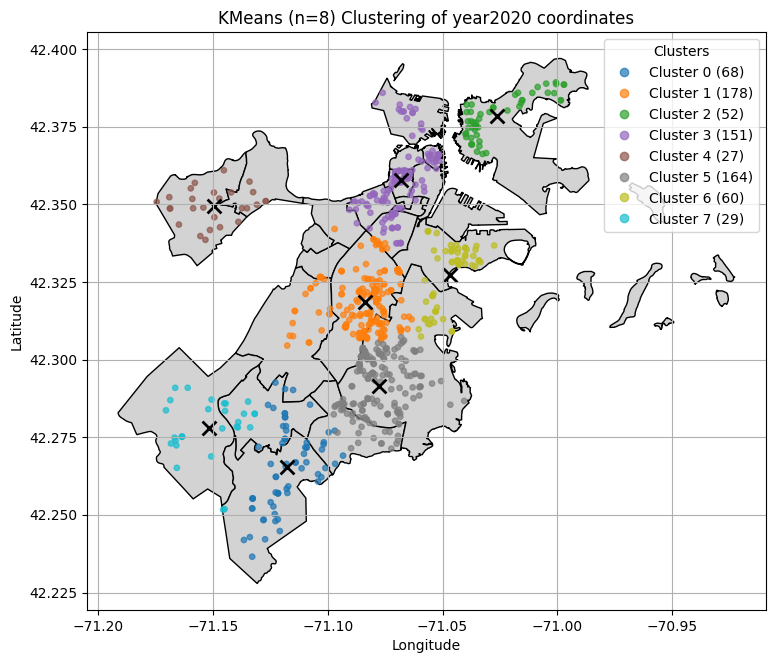

In [20]:
# Run KMeans clustering on year2020 latitude/longitude data
# Prepare data (drop rows with missing coords)
X = year2020[["latitude", "longitude"]].dropna()

# Fit KMeans (adjust n_clusters as desired)
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_  # centroids in [latitude, longitude] order

# Plot clusters (longitude = x-axis, latitude = y-axis)
fig, ax = plt.subplots(1, 1, figsize=(12, 7.5))

neighborhoods = gpd.read_file('rawdata/ShapeFiles/Boston_Neighborhood_Boundaries.shp')

# Overlay the scatterplot
neighborhoods.plot(ax=ax, color='lightgray', edgecolor='black')

scatter = ax.scatter(X["longitude"], X["latitude"], c=labels, cmap='tab10', s=15, alpha=0.7)
# Plot centroids (note ordering)
ax.scatter(centroids[:, 1], centroids[:, 0], c='black', marker='x', s=100, linewidths=2, label='centroids')

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title(f"KMeans (n={n_clusters}) Clustering of year2020 coordinates")
ax.grid(True)

# Print cluster sizes and add legend showing counts
counts = collections.Counter(labels)
legend_labels = [f'Cluster {i} ({counts[i]})' for i in range(n_clusters)]
# use scatter's legend elements for color swatches
handles, _ = scatter.legend_elements()
ax.legend(handles=handles, labels=legend_labels, title='Clusters', loc='best')


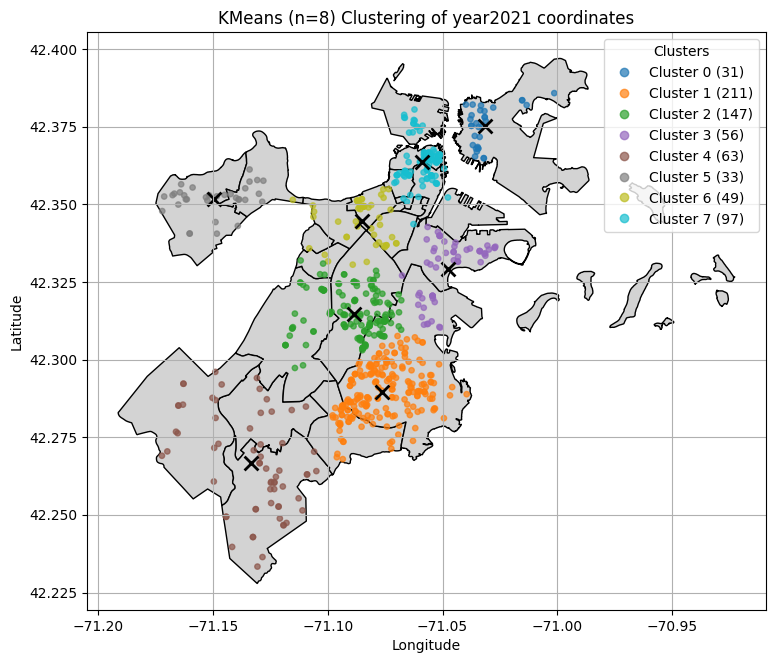

In [22]:
# Run KMeans clustering on year2021 latitude/longitude data
# Prepare data (drop rows with missing coords)
X = year2021[["latitude", "longitude"]].dropna()

# Fit KMeans (adjust n_clusters as desired)
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_  # centroids in [latitude, longitude] order

# Plot clusters (longitude = x-axis, latitude = y-axis)
fig, ax = plt.subplots(1, 1, figsize=(12, 7.5))

neighborhoods = gpd.read_file('rawdata/ShapeFiles/Boston_Neighborhood_Boundaries.shp')

# Overlay the scatterplot
neighborhoods.plot(ax=ax, color='lightgray', edgecolor='black')

scatter = ax.scatter(X["longitude"], X["latitude"], c=labels, cmap='tab10', s=15, alpha=0.7)
# Plot centroids (note ordering)
ax.scatter(centroids[:, 1], centroids[:, 0], c='black', marker='x', s=100, linewidths=2, label='centroids')

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title(f"KMeans (n={n_clusters}) Clustering of year2021 coordinates")
ax.grid(True)

# Print cluster sizes and add legend showing counts
counts = collections.Counter(labels)
legend_labels = [f'Cluster {i} ({counts[i]})' for i in range(n_clusters)]
# use scatter's legend elements for color swatches
handles, _ = scatter.legend_elements()
ax.legend(handles=handles, labels=legend_labels, title='Clusters', loc='best')


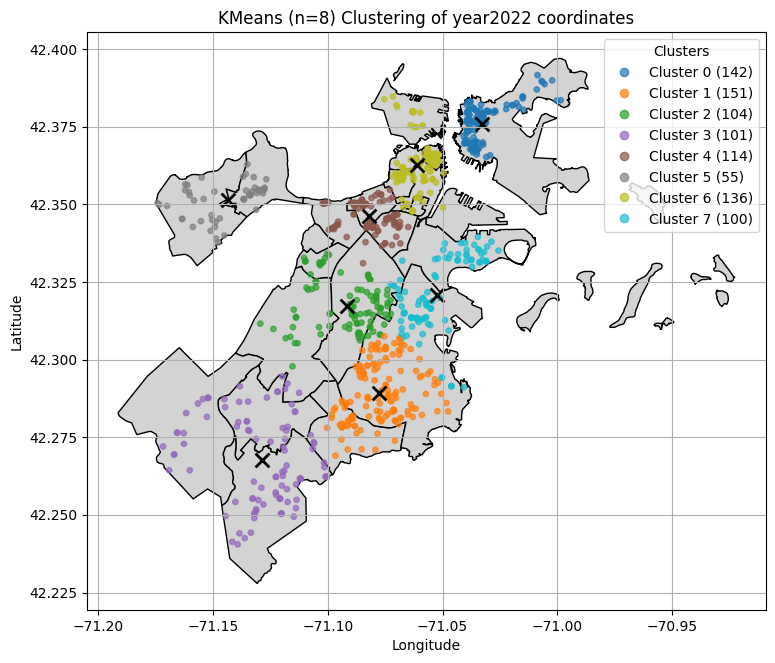

In [23]:
# Run KMeans clustering on year2022 latitude/longitude data
# Prepare data (drop rows with missing coords)
X = year2022[["latitude", "longitude"]].dropna()

# Fit KMeans (adjust n_clusters as desired)
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_  # centroids in [latitude, longitude] order

# Plot clusters (longitude = x-axis, latitude = y-axis)
fig, ax = plt.subplots(1, 1, figsize=(12, 7.5))

neighborhoods = gpd.read_file('rawdata/ShapeFiles/Boston_Neighborhood_Boundaries.shp')

# Overlay the scatterplot
neighborhoods.plot(ax=ax, color='lightgray', edgecolor='black')

scatter = ax.scatter(X["longitude"], X["latitude"], c=labels, cmap='tab10', s=15, alpha=0.7)
# Plot centroids (note ordering)
ax.scatter(centroids[:, 1], centroids[:, 0], c='black', marker='x', s=100, linewidths=2, label='centroids')

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title(f"KMeans (n={n_clusters}) Clustering of year2022 coordinates")
ax.grid(True)

# Print cluster sizes and add legend showing counts
counts = collections.Counter(labels)
legend_labels = [f'Cluster {i} ({counts[i]})' for i in range(n_clusters)]
# use scatter's legend elements for color swatches
handles, _ = scatter.legend_elements()
ax.legend(handles=handles, labels=legend_labels, title='Clusters', loc='best')


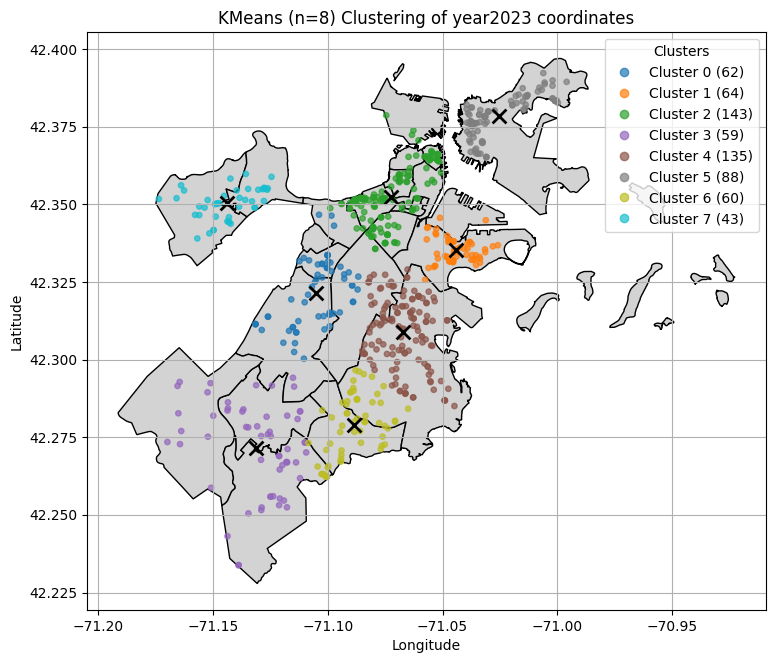

In [24]:
# Run KMeans clustering on year2023 latitude/longitude data
# Prepare data (drop rows with missing coords)
X = year2023[["latitude", "longitude"]].dropna()

# Fit KMeans (adjust n_clusters as desired)
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_  # centroids in [latitude, longitude] order

# Plot clusters (longitude = x-axis, latitude = y-axis)
fig, ax = plt.subplots(1, 1, figsize=(12, 7.5))

neighborhoods = gpd.read_file('rawdata/ShapeFiles/Boston_Neighborhood_Boundaries.shp')

# Overlay the scatterplot
neighborhoods.plot(ax=ax, color='lightgray', edgecolor='black')

scatter = ax.scatter(X["longitude"], X["latitude"], c=labels, cmap='tab10', s=15, alpha=0.7)
# Plot centroids (note ordering)
ax.scatter(centroids[:, 1], centroids[:, 0], c='black', marker='x', s=100, linewidths=2, label='centroids')

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title(f"KMeans (n={n_clusters}) Clustering of year2023 coordinates")
ax.grid(True)

# Print cluster sizes and add legend showing counts
counts = collections.Counter(labels)
legend_labels = [f'Cluster {i} ({counts[i]})' for i in range(n_clusters)]
# use scatter's legend elements for color swatches
handles, _ = scatter.legend_elements()
ax.legend(handles=handles, labels=legend_labels, title='Clusters', loc='best')


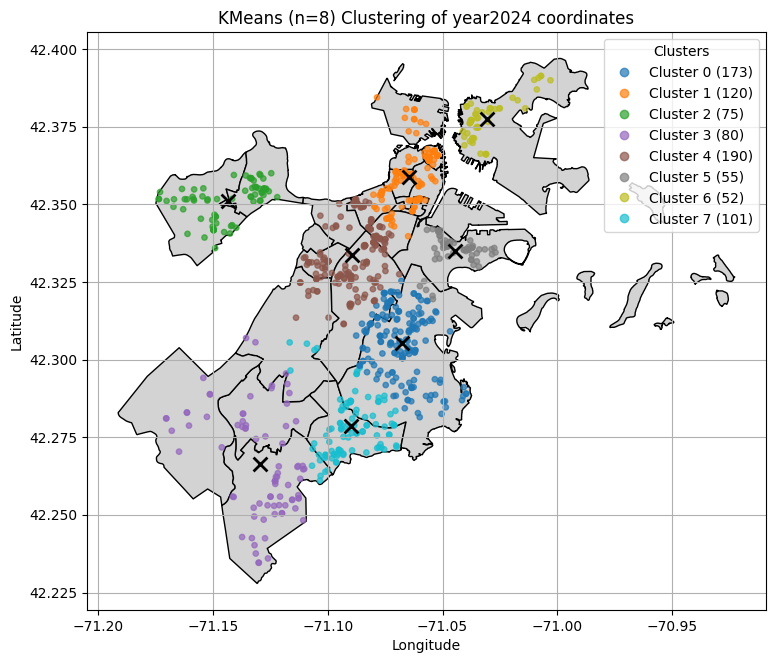

In [25]:
# Run KMeans clustering on year2024 latitude/longitude data
# Prepare data (drop rows with missing coords)
X = year2024[["latitude", "longitude"]].dropna()

# Fit KMeans (adjust n_clusters as desired)
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_  # centroids in [latitude, longitude] order

# Plot clusters (longitude = x-axis, latitude = y-axis)
fig, ax = plt.subplots(1, 1, figsize=(12, 7.5))

neighborhoods = gpd.read_file('rawdata/ShapeFiles/Boston_Neighborhood_Boundaries.shp')

# Overlay the scatterplot
neighborhoods.plot(ax=ax, color='lightgray', edgecolor='black')

scatter = ax.scatter(X["longitude"], X["latitude"], c=labels, cmap='tab10', s=15, alpha=0.7)
# Plot centroids (note ordering)
ax.scatter(centroids[:, 1], centroids[:, 0], c='black', marker='x', s=100, linewidths=2, label='centroids')

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title(f"KMeans (n={n_clusters}) Clustering of year2024 coordinates")
ax.grid(True)

# Print cluster sizes and add legend showing counts
counts = collections.Counter(labels)
legend_labels = [f'Cluster {i} ({counts[i]})' for i in range(n_clusters)]
# use scatter's legend elements for color swatches
handles, _ = scatter.legend_elements()
ax.legend(handles=handles, labels=legend_labels, title='Clusters', loc='best')


# Handle the Housing Violation Counts

In [28]:
def violation_counts_year(year_df):
    descs = year_df["description"].unique()
    descs_counts = []

    for d in descs: 
        count = len(year_df[year_df["description"] == d])
        descs_counts.append(count)

    data_dict = {
        "Violation Descs": descs,
        "Counts": descs_counts
    }

    viol_year = pd.DataFrame(data_dict)
    sorted_df_desc = viol_year.sort_values(by='Counts', ascending=False)

    return sorted_df_desc

violations_allyears = violation_counts_year(df_filtered)

violations_2020 = violation_counts_year(year2020)
violations_2021 = violation_counts_year(year2021)
violations_2022 = violation_counts_year(year2022)
violations_2023 = violation_counts_year(year2023)
violations_2024 = violation_counts_year(year2024)

violations_allyears.head(10)

,Violation Descs,Counts
1,Failure to Obtain Permit,1110
0,Maintenance,677
4,Unsafe Structures,490
7,Testing & Certification,453
12,Unsafe and Dangerous,335
6,Failed to comply w permit term,133
3,Protection of Adj. Property,62
20,Right of Entry,58
23,Certificate of Occupancy,47
21,Building or Use of Premise req,41


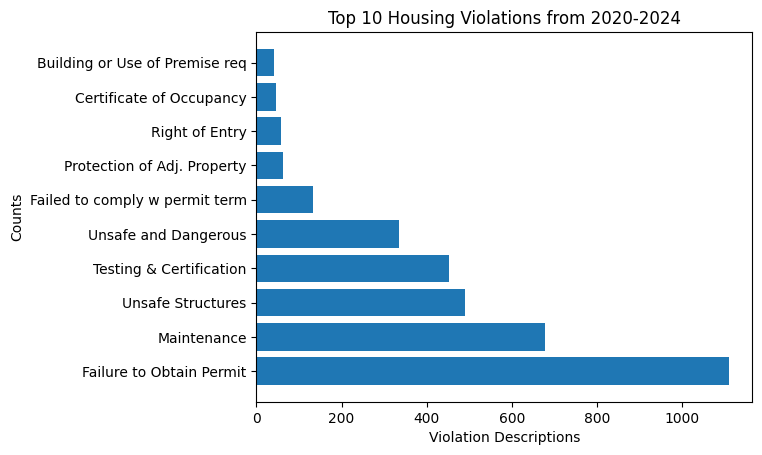

In [ ]:
# Sample data for All Years
allyears_d = violations_allyears["Violation Descs"][:10]
allyears_c = violations_allyears["Counts"][:10]

# Create horizontal bars
plt.barh(allyears_d, allyears_c)

# Add labels and title
plt.xlabel('Violation Descriptions')
plt.ylabel('Counts')
plt.title('Top 10 Housing Violations from 2020-2024')

# Display the plot
plt.show()

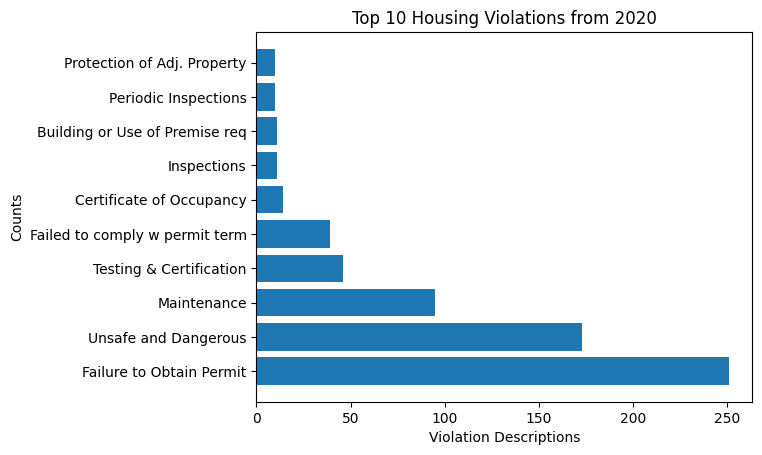

In [ ]:
# Sample data for 2020
allyears_d = violations_2020["Violation Descs"][:10]
allyears_c = violations_2020["Counts"][:10]

# Create horizontal bars
plt.barh(allyears_d, allyears_c)

# Add labels and title
plt.xlabel('Violation Descriptions')
plt.ylabel('Counts')
plt.title('Top 10 Housing Violations from 2020')

# Display the plot
plt.show()

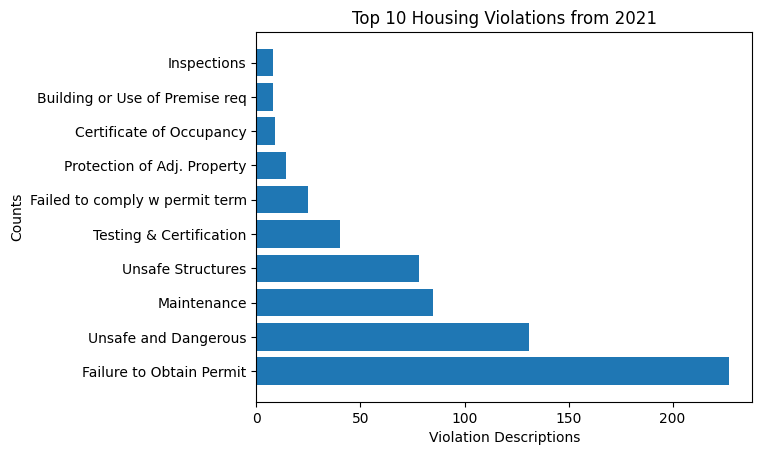

In [33]:
# Sample data for 2021
allyears_d = violations_2021["Violation Descs"][:10]
allyears_c = violations_2021["Counts"][:10]

# Create horizontal bars
plt.barh(allyears_d, allyears_c)

# Add labels and title
plt.xlabel('Violation Descriptions')
plt.ylabel('Counts')
plt.title('Top 10 Housing Violations from 2021')

# Display the plot
plt.show()

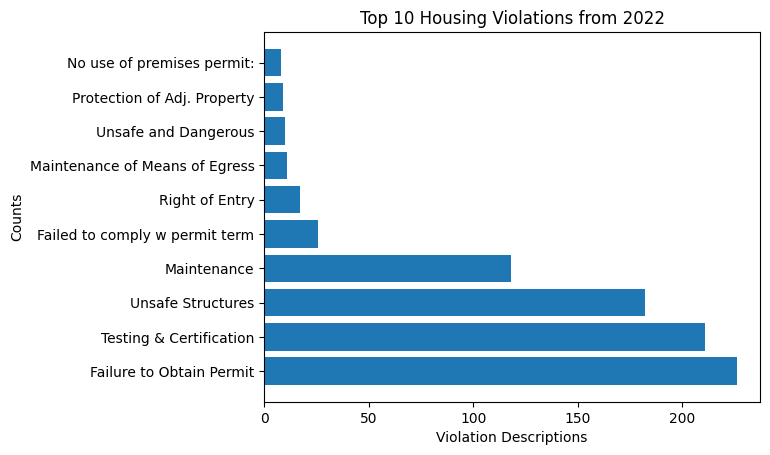

In [34]:
# Sample data for 2022
allyears_d = violations_2022["Violation Descs"][:10]
allyears_c = violations_2022["Counts"][:10]

# Create horizontal bars
plt.barh(allyears_d, allyears_c)

# Add labels and title
plt.xlabel('Violation Descriptions')
plt.ylabel('Counts')
plt.title('Top 10 Housing Violations from 2022')

# Display the plot
plt.show()

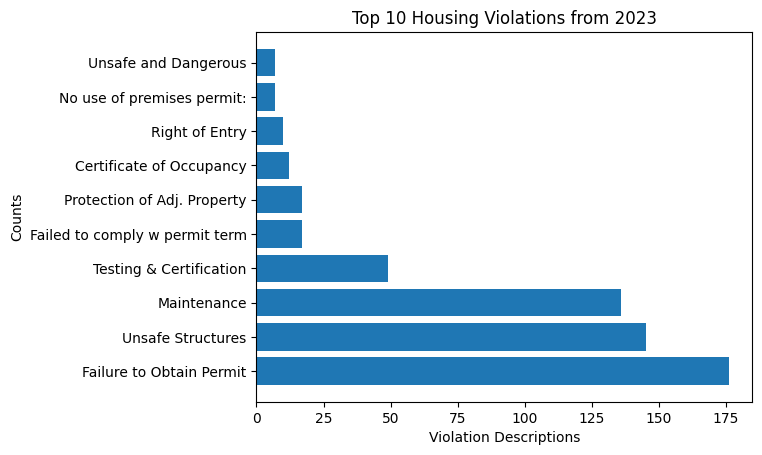

In [35]:
# Sample data for 2023
allyears_d = violations_2023["Violation Descs"][:10]
allyears_c = violations_2023["Counts"][:10]

# Create horizontal bars
plt.barh(allyears_d, allyears_c)

# Add labels and title
plt.xlabel('Violation Descriptions')
plt.ylabel('Counts')
plt.title('Top 10 Housing Violations from 2023')

# Display the plot
plt.show()

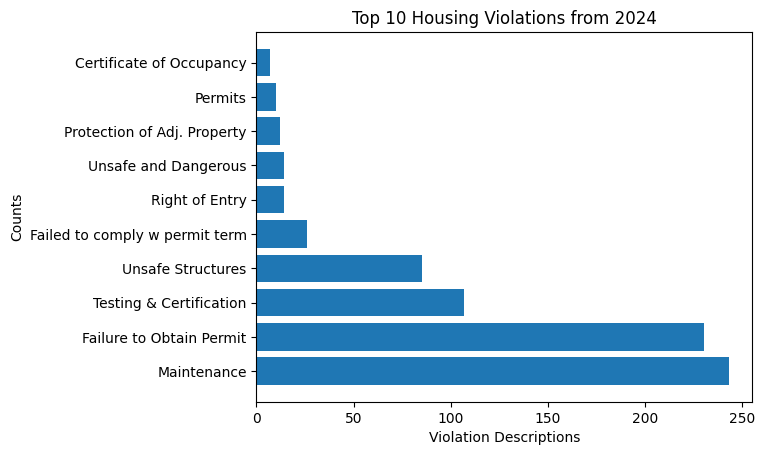

In [36]:
# Sample data for 2024
allyears_d = violations_2024["Violation Descs"][:10]
allyears_c = violations_2024["Counts"][:10]

# Create horizontal bars
plt.barh(allyears_d, allyears_c)

# Add labels and title
plt.xlabel('Violation Descriptions')
plt.ylabel('Counts')
plt.title('Top 10 Housing Violations from 2024')

# Display the plot
plt.show()